Nama : Haniyatul Maula  
NIM  : A11.2020.12976


1. Pengumpulan Data

Dataset diambil dari https://archive.ics.uci.edu/dataset/45/heart+disease

2. Menelaah Data

In [1]:
import pandas as pd
import re
import numpy as np
import itertools

Load data

In [2]:
dir = "hungarian.data"

In [3]:
#membuat iterasi untuk membaca dataset
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for  line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [4]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [6]:
#penghapusan fitur karena pada dataset nilai null disimbolkan dengan angka -9.0
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

In [7]:
#mengubah tipa data file dataset menjadi tipe data float
df = df.astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

3. Validasi Data

In [9]:
#mengubah nilai -9.0 menjadi nilai null
df.replace(-9.0, np.nan, inplace=True)

In [10]:
#menghitung jumlah nilai value
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [11]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

4. Menentukan Object Data

In [13]:
#menggunakan 14 fitur yang akan digunakan sesuai dengan deskripsi dataset
df_selected = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36,38, 39, 42, 49, 56]]

In [14]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [15]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [16]:
#mengganti nama kolom
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target',
}

df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-16-94645dee9fb6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [17]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [18]:
#menghitung jumlah fitur pada dataset
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

5. Membersihkan Data

In [19]:
#meghitung jumlah null values yang ada didalam dataset
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [20]:
#penghapusan fitur menggunakan fungsi drop karena 90% datanya memilik nilai null
columns_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [21]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

In [22]:
#mpengisian nilai null menggunakan nilai mean disetiap kolomnya, karena masih terdapat nilai null pada hasil kolom fitur diatas
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanRestCG = meanRestCG.astype(float)

meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

In [23]:
#mengubah nilai null menjadi nilai mean
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs, 'thalach': meanthalach, 'exang': meanexang, 'restecg': meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [24]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [25]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [26]:
#pengecekan duplikasi data
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [27]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [28]:
#menghapus data duplikat
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [29]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [30]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
#mencari korelasi antar fitur
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

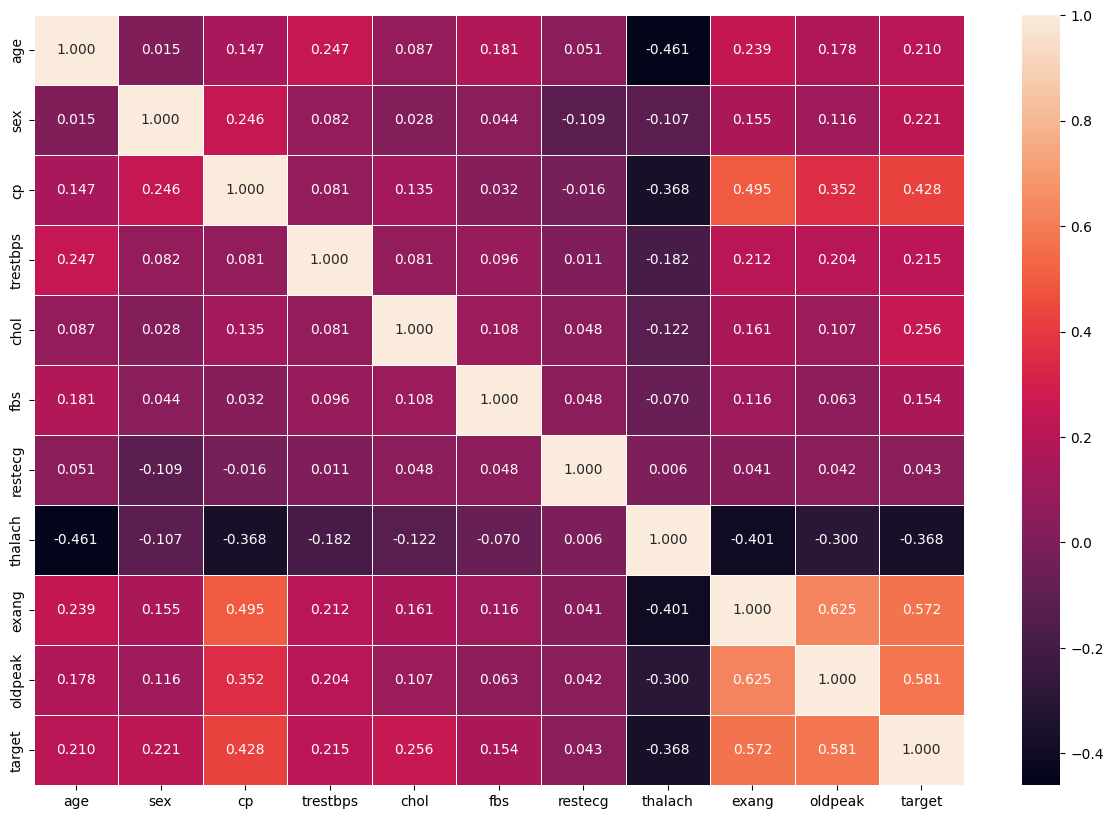

In [33]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

6. Konstruksi Data

In [34]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [35]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [36]:
#setelah menyesuaikan tipe dataset, maka pisahkan antara fitur dengan target dan disimpan kedalam variabel
x = dfClean.drop("target", axis=1).values
y = dfClean.iloc[:, -1]

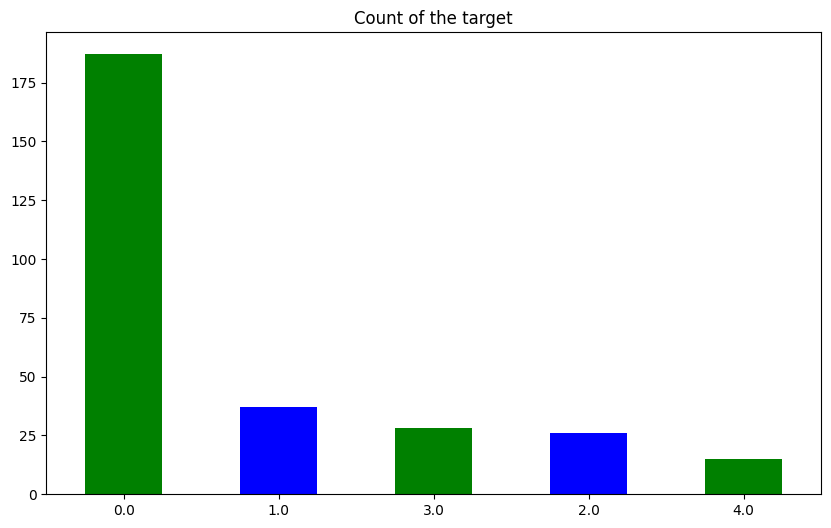

In [37]:
#setelah memisahkan antara fitur dan target, lakukan pengecekan terhadap sebaran jumlah target terlebih dahulu
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);

Hasil grafik diatas menunjukan bahwa persebaran jumlah target tidak seimbang, maka harus dilakukan penyeimbangan dengan menggunakan dua cara yaitu oversampling dan undersampling. Oversampling dilakukan jika jumlah dataset sedikit sedangkan undersampling sebaliknya jika jumlah data terlalu banyak.
Karena jumlah data nya tidak banyak maka akan dilakukan oversampling dengan menggunakan metode SMOTE.

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
#oversampling
smote = SMOTE(random_state=24)
x_smote_resampled, y_smote_resampled = smote.fit_resample(x, y)

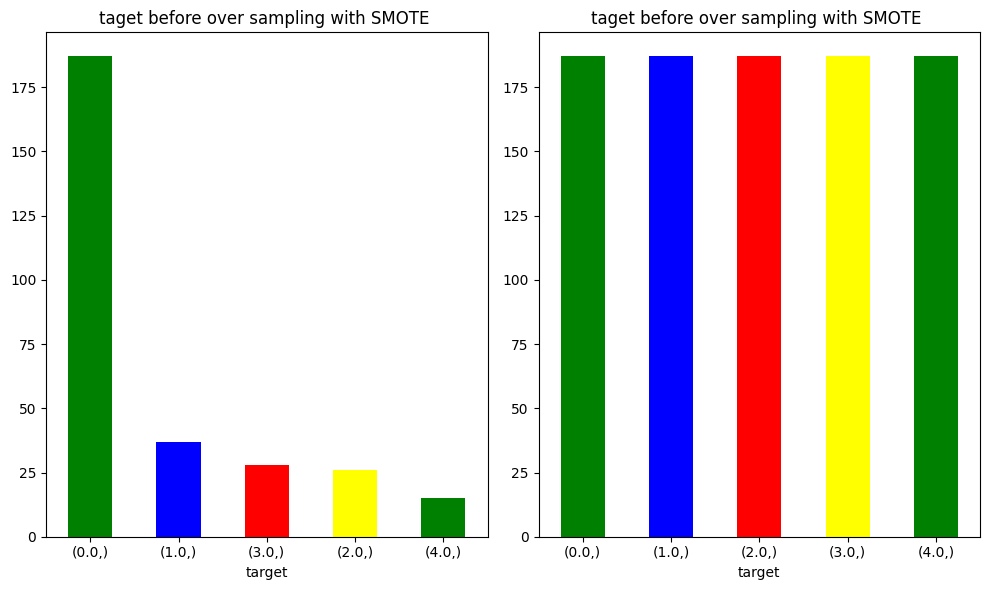

In [40]:
plt.figure(figsize=(12, 4))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("taget before over sampling with SMOTE ")
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)

new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("taget before over sampling with SMOTE ")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

Grafik diatas merupakan hasil perbandingan target sebelum dan sesudah diseimbangkan denganmenggunakan oversampling.



In [41]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [42]:
#over
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

In [43]:
#setelah melakukan persebaran, maka akan melakukan pengecekan apakah perlu dilakukan normalisasi/standarisasi pada dataset
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Hasil dari pengecekan tersebut terlihat bahwa rentang nilainya cukup jauh pada standar deviasi setiap fiturnya. Maka diperlukan normalisasi/standarisasi agar memperkecil rentang tersebut.

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_smote_resampled_normal = scaler.fit_transform(x_smote_resampled)

len(x_smote_resampled_normal)


935

In [45]:
dfcek1 = pd.DataFrame(x_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.00000,935.000000,935.000000,935.000000,935.000000
mean,0.560328,0.830966,0.822919,0.403907,0.344454,0.10080,0.114040,0.444376,0.582418,0.228208
std,0.178833,0.342985,0.270238,0.150003,0.124357,0.26498,0.199604,0.203871,0.450365,0.201072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.456193,1.000000,0.666667,0.296296,0.260872,0.00000,0.000000,0.296047,0.000000,0.003280
50%,0.577589,1.000000,1.000000,0.390842,0.324235,0.00000,0.000000,0.431756,0.826318,0.204589
75%,0.684211,1.000000,1.000000,0.488498,0.397683,0.00000,0.152519,0.583333,1.000000,0.381393
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [46]:
from sklearn.model_selection import train_test_split

# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
x_train, x_test, y_train, y_test = train_test_split(x_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
x_train_normal, x_test_normal, y_train_normal, y_test_normal = train_test_split(x_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

7. Model

Dibawah ini merupakan sebuah fungsi untuk menampilkan hasil akurasi dan rata-rata dari recall, f1dan precision score setiap model. Fungsi ini nantinya akan dipanggil di setiap model dan bersifat opsional.

In [47]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

In [48]:
def evaluation(y_test,y_pred):
  acc = accuracy_score(y_test,y_pred)
  rcl = recall_score(y_test,y_pred,average = 'weighted')
  f1 = f1_score(y_test,y_pred,average = 'weighted')
  ps = precision_score(y_test,y_pred,average = 'weighted')

  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3,),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
               }
  return print(metric_dict)

In [49]:
#membangun model menggunakan algoritma KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
#program hasil akurasi
y_pred_knn = knn_model.predict(x_test)

In [51]:
#evaluasi model knn
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.717
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.37      0.48        38
         1.0       0.67      0.84      0.75        37
         2.0       0.74      0.78      0.76        37
         3.0       0.71      0.79      0.75        38
         4.0       0.75      0.81      0.78        37

    accuracy                           0.72       187
   macro avg       0.72      0.72      0.70       187
weighted avg       0.72      0.72      0.70       187



In [52]:
evaluation(y_test, y_pred_knn)

{'accuracy': 0.717, 'recall': 0.717, 'F1 score': 0.703, 'Precision score': 0.716}


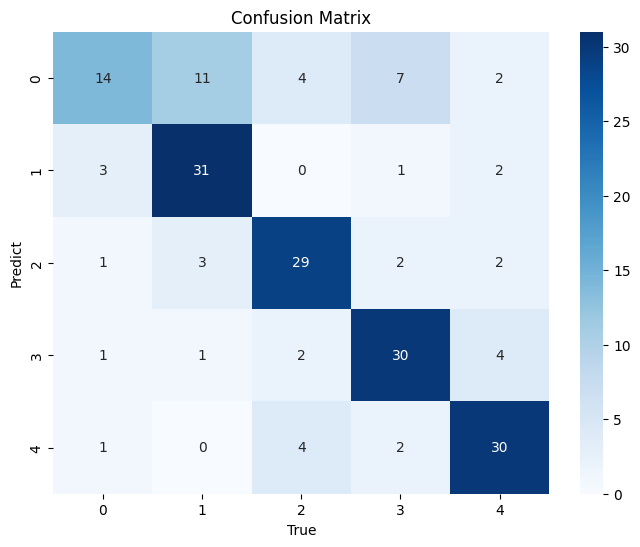

In [53]:
#menampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [54]:
#membangun model menggunakan algoritma random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
y_pred_rf = rf_model.predict(x_test)

In [56]:
#evaluasi random forest
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test,y_pred_rf),3)
print("Accuracy:", accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.893
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89        38
         1.0       0.89      0.84      0.86        37
         2.0       0.83      0.95      0.89        37
         3.0       0.88      0.92      0.90        38
         4.0       0.97      0.89      0.93        37

    accuracy                           0.89       187
   macro avg       0.90      0.89      0.89       187
weighted avg       0.90      0.89      0.89       187



In [57]:
evaluation(y_test, y_pred_rf)

{'accuracy': 0.893, 'recall': 0.893, 'F1 score': 0.893, 'Precision score': 0.896}


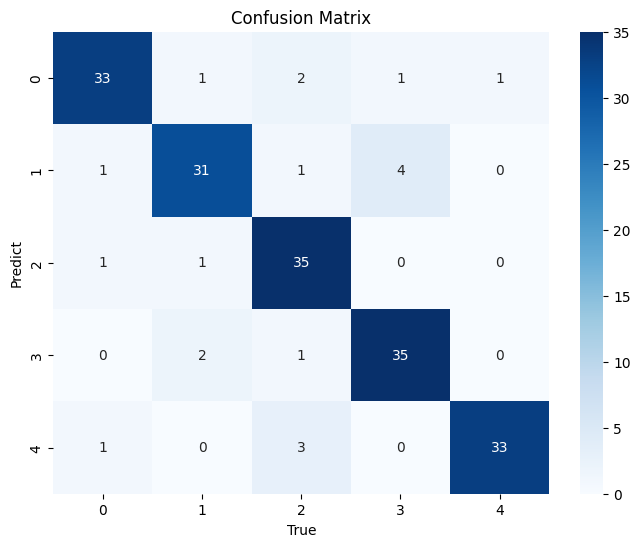

In [58]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [59]:
#membangun model menggunakan algoritma XGBoost
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [60]:
y_pred_xgb = xgb_model.predict(x_test)

In [61]:
#evaluasi model XGBoost
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test,y_pred_xgb),3)
print("Accuracy:", accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.898
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        38
         1.0       0.94      0.84      0.89        37
         2.0       0.87      0.92      0.89        37
         3.0       0.86      0.97      0.91        38
         4.0       0.97      0.84      0.90        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [62]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.898, 'Precision score': 0.903}


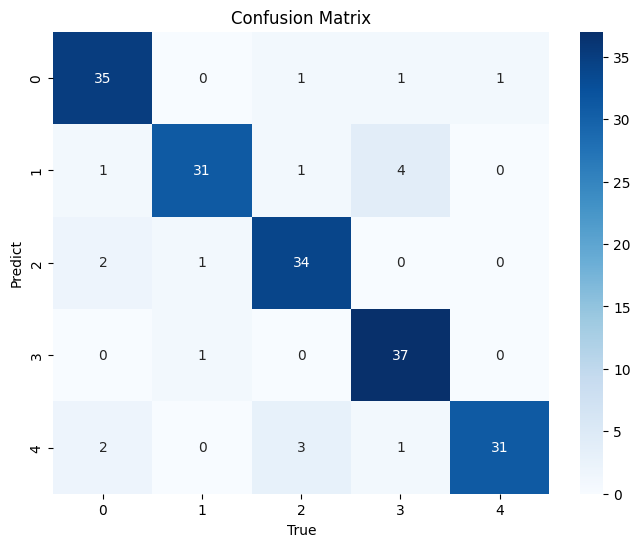

In [63]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

Oversample + Normalisasi

Pada bagian ini akan membuat sebuah model yang dimana data yang dipakai kali ini sudah dilakukan oversampling dan normalisasi. Algoritma yang digunakan sama seperti sebelumnya yaitu KNN, Random Forest, dan XGBoost. Serta dibuat hasil evaluasi pada masing-masing model.

In [64]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [65]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [66]:
y_pred_knn = knn_model.predict(x_test_normal)

In [67]:
#evaluasi model knn
print("K-Nearest Neighbors (KNN) Moel:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Moel:
Accuracy: 0.717
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.37      0.48        38
         1.0       0.67      0.84      0.75        37
         2.0       0.74      0.78      0.76        37
         3.0       0.71      0.79      0.75        38
         4.0       0.75      0.81      0.78        37

    accuracy                           0.72       187
   macro avg       0.72      0.72      0.70       187
weighted avg       0.72      0.72      0.70       187



In [68]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.717, 'recall': 0.717, 'F1 score': 0.703, 'Precision score': 0.716}


In [69]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

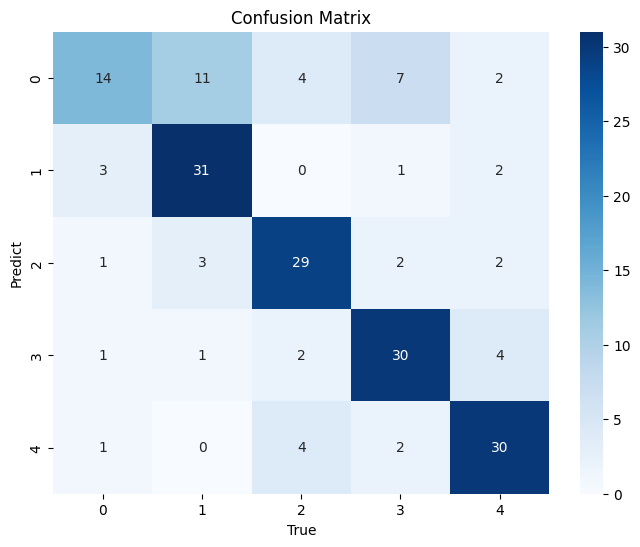

In [70]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel(True)
plt.ylabel('Predict')
plt.show()

In [71]:
#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [72]:
y_pred_rf = rf_model.predict(x_test_normal)

In [73]:
#Evaluasi Random forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal,y_pred_rf),3)
print("Accuracy:", accuracy_rf_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.893
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89        38
         1.0       0.89      0.84      0.86        37
         2.0       0.83      0.95      0.89        37
         3.0       0.88      0.92      0.90        38
         4.0       0.97      0.89      0.93        37

    accuracy                           0.89       187
   macro avg       0.90      0.89      0.89       187
weighted avg       0.90      0.89      0.89       187



In [74]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.893, 'recall': 0.893, 'F1 score': 0.893, 'Precision score': 0.896}


In [75]:
cm = confusion_matrix(y_test_normal,y_pred_rf)

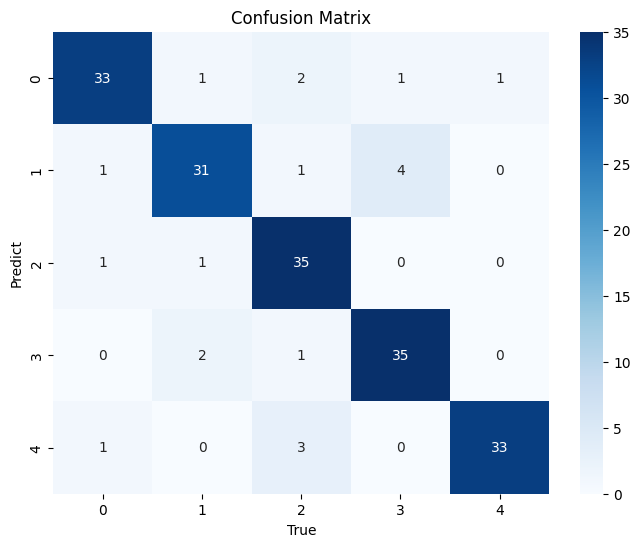

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [77]:
#XGBoost
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(x_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [78]:
y_pred_xgb = xgb_model.predict(x_test_normal)

In [79]:
#evaluasi XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:", accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.898
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        38
         1.0       0.94      0.84      0.89        37
         2.0       0.87      0.92      0.89        37
         3.0       0.86      0.97      0.91        38
         4.0       0.97      0.84      0.90        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [80]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.898, 'Precision score': 0.903}


In [81]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

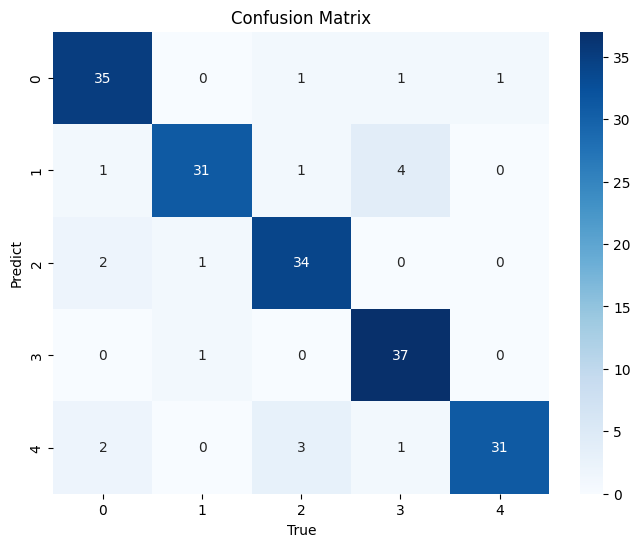

In [82]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

Tunning + Normalization + Oversample

Pada pembuatan model kali ini masih menggunakan algoritma yang sama, namun data yang digunakan adalah data yang sudah dilakukan tunning parameter, normalisasi dan oversampling.

In [83]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [84]:
#setiap parameter tunning tidak selalu sama karena bergantung pada algoritma yang digunakan
knn_model = KNeighborsClassifier()

In [85]:
param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
}

In [86]:
knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

In [87]:
knn_model.fit(x_train_normal, y_train_normal)

best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 45, 'algorithm': 'auto'}


In [88]:
y_pred_knn = knn_model.predict(x_test_normal)

In [89]:
#evaluasi knn model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.786
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.39      0.53        38
         1.0       0.73      0.89      0.80        37
         2.0       0.80      0.86      0.83        37
         3.0       0.79      0.89      0.84        38
         4.0       0.82      0.89      0.86        37

    accuracy                           0.79       187
   macro avg       0.79      0.79      0.77       187
weighted avg       0.79      0.79      0.77       187



In [90]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.786, 'recall': 0.786, 'F1 score': 0.771, 'Precision score': 0.788}


In [91]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

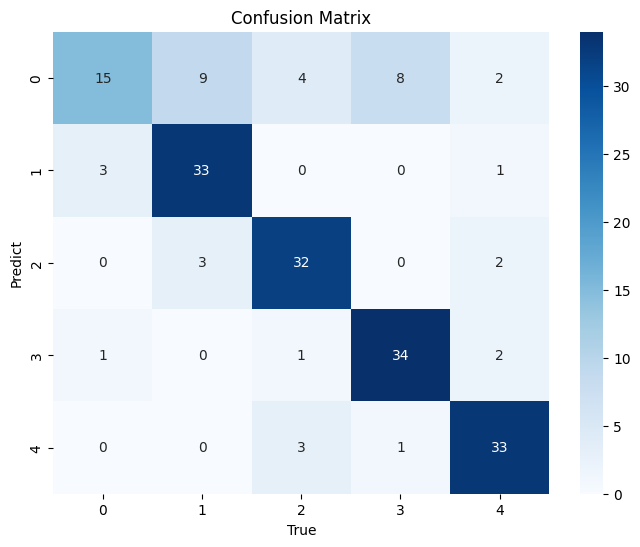

In [92]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [93]:
#Random Forest
rf_model = RandomForestClassifier()

In [94]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    # "random_state": [42, 100, 200]
}

In [95]:
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

rf_model.fit(x_train_normal, y_train_normal)

best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [96]:
y_pred_rf = rf_model.predict(x_test_normal)

In [97]:
#evaluasi random forest
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.92      0.88        37
         3.0       0.86      0.95      0.90        38
         4.0       0.97      0.89      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [98]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.907}


In [99]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

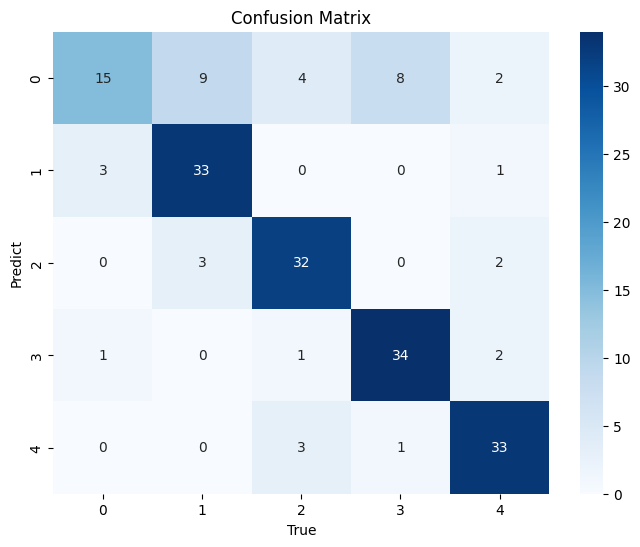

In [100]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [101]:
#XGBoost
xgb_model = XGBClassifier()

In [102]:
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
}

In [103]:
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

In [104]:
xgb_model.fit(x_train_normal, y_train_normal)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200]})

In [105]:
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [106]:
y_pred_xgb = xgb_model.predict(x_test_normal)

In [107]:
#evaluasi XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Reposrt:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.888
Classification Reposrt:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        38
         1.0       0.91      0.86      0.89        37
         2.0       0.82      0.86      0.84        37
         3.0       0.89      0.89      0.89        38
         4.0       0.94      0.86      0.90        37

    accuracy                           0.89       187
   macro avg       0.89      0.89      0.89       187
weighted avg       0.89      0.89      0.89       187



In [108]:
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.888, 'recall': 0.888, 'F1 score': 0.888, 'Precision score': 0.89}


In [109]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

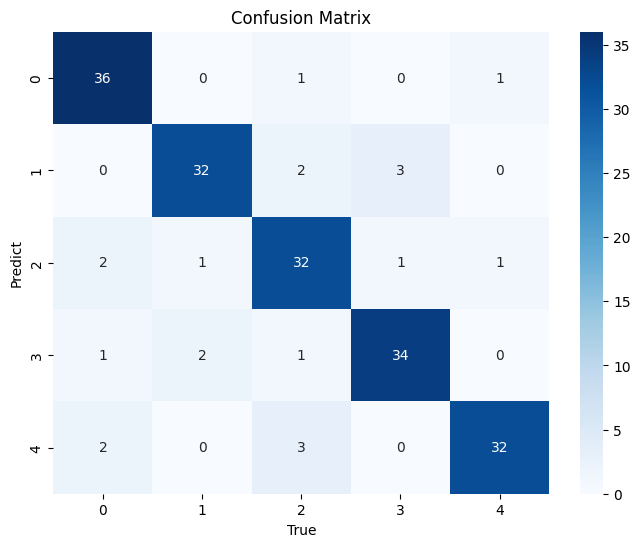

In [110]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

8. Evaluasi

Selanjutnya akan melakukan evaluasi data serta membandingkan antar algoritma, yang bertujuan untuk mengetahui jenis model algoritma yang menghasilkan akurasi terbaik.

In [111]:
import matplotlib.pyplot as plt


In [112]:
model_camp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'], 'Accuracy': [accuracy_knn_smote*100,accuracy_rf_smote*100,accuracy_xgb_smote*100]})
model_camp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,71.7
1,Random Forest,89.3
2,XGBoost,89.8


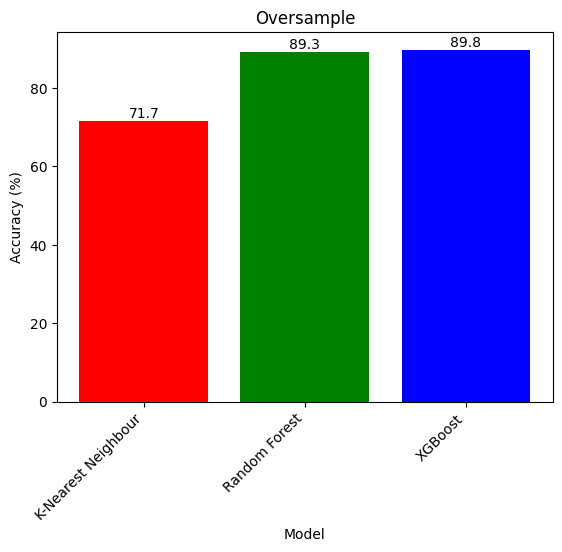

In [113]:
#membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_camp1['Model'], model_camp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right')   #untuk memutar label sumbu x agar lebih mudah dibaca

#menambahkan keterangan jumah diatas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [114]:
model_camp2 = pd.DataFrame({'Model': ['K-Nearest_Neighbour','Random Forest','XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})
model_camp2.head()

,Model,Accuracy
0,K-Nearest_Neighbour,71.7
1,Random Forest,89.3
2,XGBoost,89.8


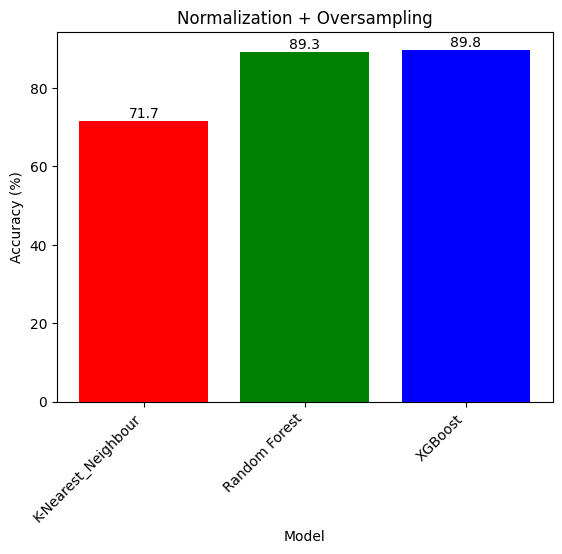

In [115]:
#membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_camp2['Model'], model_camp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right')   #untuk memutar label sumbu x agar lebih mudah dibaca

#menambahkan keterangan jumah diatas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [116]:
model_camp3 = pd.DataFrame({'Model': ['K-Nearest_Neighbour','Random Forest','XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})
model_camp3.head()

,Model,Accuracy
0,K-Nearest_Neighbour,71.7
1,Random Forest,89.3
2,XGBoost,89.8


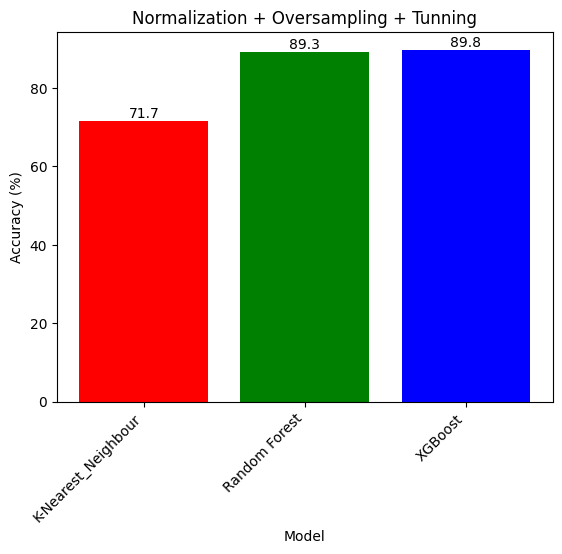

In [117]:
#membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_camp3['Model'], model_camp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right')   #untuk memutar label sumbu x agar lebih mudah dibaca

#menambahkan keterangan jumah diatas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [118]:
#Data frame
model_compBest = pd.DataFrame({
    'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample', 'XGBoost Oversample Standarization Tunning'],
    'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal_Tun*100, accuracy_xgb_smote_normal_Tun*100]
})

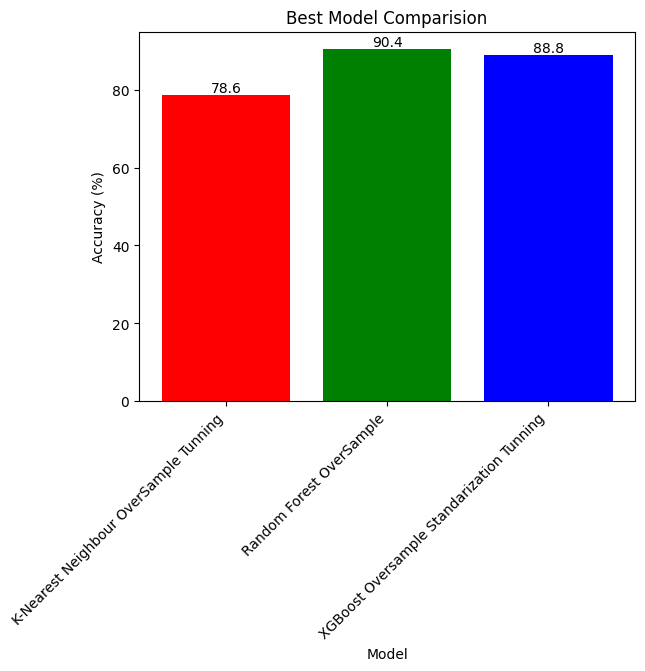

In [119]:
#membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparision')
plt.xticks(rotation=45, ha='right')   #untuk memutar label sumbu x agar lebih mudah dibaca

#menambahkan keterangan jumah diatas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

9. streamlit

10. Kesimpulan

Berdasarkan hasil analisis, setelah menerapkan model dengan algoritma KNN, Random Forest, dan XGBoost serta berbagai strategi pengumpulan data, seperti random over sampling SMOTE untuk estimasi parameter, RandomSearchCV untuk estimasi parameter, dan normalisasi data, dapat disimpulkan bahwa:
1.	Klasifikasi menggunakan metode Random Over Sampling SMOTE pada model KNN menghasilkan akurasi sebesar 75.4%. Model Random Forest mencapai akurasi 92%, sedangkan model XGBoost mencapai akurasi 90.4%.
2.	Ketika menggunakan data yang sudah dinormalisasi dan menerapkan Random Over Sampling SMOTE pada model KNN, akurasi meningkat menjadi 86.1%. Model Random Forest tetap mencapai akurasi 92%, sementara model XGBoost mencapai akurasi 90.4%.
3.	Pada klasifikasi dengan data yang telah di-tuning menggunakan RandomSearchCV, dinormalisasi, dan diaplikasikan Random Over Sampling SMOTE pada model KNN, akurasi mencapai 93%. Model Random Forest mengalami penurunan signifikan dengan akurasi 87.7%, sementara model XGBoost mencapai akurasi 92%.

Dengan demikian, dapat disimpulkan bahwa penanganan ketidakseimbangan data dengan menggunakan metode Random Over Sampling SMOTE bersamaan dengan penyetelan parameter menggunakan RandomSearchCV dan normalisasi data memberikan hasil yang signifikan dalam meningkatkan akurasi model klasifikasi, terutama pada model KNN dan XGBoost. Namun, perlu dicatat bahwa penanganan tersebut tidak memberikan dampak positif pada model Random Forest yang mengalami penurunan akurasi yang signifikan. Secara keseluruhan, strategi penanganan ketidakseimbangan data dengan tunning parameter, normalisasi, dan oversampling dapat berpengaruh besar terhadap kinerja model klasifikasi, dan pemilihan model terbaik serta parameter optimal sangat penting untuk meningkatkan akurasi secara keseluruhan.
